DYNAMIC TIME WARPING

In [1]:
import numpy as np

def dtw(series_1, series_2, norm_func = np.linalg.norm):
	matrix = np.zeros((len(series_1) + 1, len(series_2) + 1))
	matrix[0,:] = np.inf
	matrix[:,0] = np.inf
	matrix[0,0] = 0
	for i, vec1 in enumerate(series_1):
		for j, vec2 in enumerate(series_2):
			cost = norm_func(vec1 - vec2)
			matrix[i + 1, j + 1] = cost + min(matrix[i, j + 1], matrix[i + 1, j], matrix[i, j])
	matrix = matrix[1:,1:]
	i = matrix.shape[0] - 1
	j = matrix.shape[1] - 1
	matches = []
	mappings_series_1 = [list() for v in range(matrix.shape[0])]
	mappings_series_2 = [list() for v in range(matrix.shape[1])]
	while i > 0 or j > 0:
		matches.append((i, j))
		mappings_series_1[i].append(j)
		mappings_series_2[j].append(i)
		option_diag = matrix[i - 1, j - 1] if i > 0 and j > 0 else np.inf
		option_up = matrix[i - 1, j] if i > 0 else np.inf
		option_left = matrix[i, j - 1] if j > 0 else np.inf
		move = np.argmin([option_diag, option_up, option_left])
		if move == 0:
			i -= 1
			j -= 1
		elif move == 1:
			i -= 1
		else:
			j -= 1
	matches.append((0, 0))
	mappings_series_1[0].append(0)
	mappings_series_2[0].append(0)
	matches.reverse()
	for mp in mappings_series_1:
		mp.reverse()
	for mp in mappings_series_2:
		mp.reverse()

	return matches, matrix[-1, -1], mappings_series_1, mappings_series_2, matrix

In [2]:
series_1 = [1, 2, 3, 2, 2.13, 1]
series_2 = [1, 1, 2, 2, 2.42, 3, 2, 1]
matches, cost, mapping_1, mapping_2, matrix = dtw(series_1, series_2)

In [3]:
print("matches = ",matches)
print("mapping_1 = ",mapping_1)
print("mapping_2 = ",mapping_2)
print("\n")
print("Matrix :\n",matrix)

matches =  [(0, 0), (0, 1), (1, 2), (1, 3), (1, 4), (2, 5), (3, 6), (4, 6), (5, 7)]
mapping_1 =  [[0, 1], [2, 3, 4], [5], [6], [6], [7]]
mapping_2 =  [[0], [0], [1], [1], [1], [2], [3, 4], [5]]


Matrix :
 [[0.   0.   1.   2.   3.42 5.42 6.42 6.42]
 [1.   1.   0.   0.   0.42 1.42 1.42 2.42]
 [3.   3.   1.   1.   0.58 0.42 1.42 3.42]
 [4.   4.   1.   1.   1.   1.42 0.42 1.42]
 [5.13 5.13 1.13 1.13 1.29 1.87 0.55 1.55]
 [5.13 5.13 2.13 2.13 2.55 3.29 1.55 0.55]]


In [4]:
new=[]
for i in matches:
  new.append(matrix[i[0]][i[1]])
print("min = ",min(new))
time=sum(new)/len(new)
print("Time = ",time)

min =  0.0
Time =  0.26222222222222213


new project 15-5-2023

In [5]:
!pip install librosa

In [8]:
import librosa
import numpy as np

def dtw_distance(s1, s2):
    n = len(s1)
    m = len(s2)
    dtw = np.zeros((n+1, m+1))

    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = np.abs(s1[i-1] - s2[j-1])
            if i == 1 and j == 1:
                dtw[i, j] = np.mean(cost)
            else:
                dtw[i, j] = np.mean(cost) + min(dtw[i-1, j], dtw[i, j-1], dtw[i-1, j-1])

    return dtw[n, m]



In [9]:
# Load pre-existing audio file
y1, sr1 = librosa.load('pre_existing_audio.wav')

# Record audio input from user
y2, sr2 = librosa.load('user_audio_input.wav')

# Extract MFCC features from both audio files
mfcc1 = librosa.feature.mfcc(y=y1, sr=sr1)
mfcc2 = librosa.feature.mfcc(y=y2, sr=sr2)

# Compute DTW distance between the two MFCC sequences
dist = dtw_distance(mfcc1.T, mfcc2.T)

# Determine threshold value for DTW distance
threshold = 100.0

# Compare computed DTW distance to threshold value
if dist < threshold:
    print("User's audio input is a match with the pre-existing audio file.")
else:
    print("User's audio input is not a match with the pre-existing audio file.")


User's audio input is not a match with the pre-existing audio file.


In [10]:
# Load pre-existing audio file
y1, sr1 = librosa.load('pre_existing_audio.wav')

# Record audio input from user
y2, sr2 = librosa.load('user_audio_input2.wav')

# Extract MFCC features from both audio files
mfcc1 = librosa.feature.mfcc(y=y1, sr=sr1)
mfcc2 = librosa.feature.mfcc(y=y2, sr=sr2)

# Compute DTW distance between the two MFCC sequences
dist = dtw_distance(mfcc1.T, mfcc2.T)

# Determine threshold value for DTW distance
threshold = 100.0

# Compare computed DTW distance to threshold value
if dist < threshold:
    print("User's audio input is a match with the pre-existing audio file.")
else:
    print("User's audio input is not a match with the pre-existing audio file.")

User's audio input is a match with the pre-existing audio file.


In [11]:
!pip install matplotlib

<ipython-input-12-0997108888aa>:17: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(spec1, ref=np.max),
<ipython-input-12-0997108888aa>:20: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(spec2, ref=np.max),


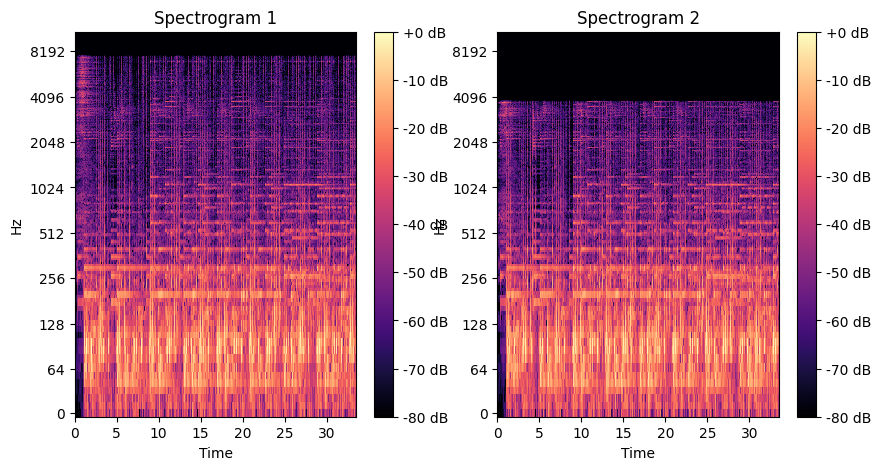

In [12]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load audio files
audio_file1 = 'pre_existing_audio.wav'
audio_file2 = 'user_audio_input.wav'
y1, sr1 = librosa.load(audio_file1)
y2, sr2 = librosa.load(audio_file2)

# Compute spectrograms
spec1 = librosa.stft(y1)
spec2 = librosa.stft(y2)

# Plot spectrograms side by side
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
librosa.display.specshow(librosa.amplitude_to_db(spec1, ref=np.max),
                         y_axis='log', x_axis='time', ax=axs[0])
axs[0].set(title='Spectrogram 1')
librosa.display.specshow(librosa.amplitude_to_db(spec2, ref=np.max),
                         y_axis='log', x_axis='time', ax=axs[1])
axs[1].set(title='Spectrogram 2')

# Add colorbars
fig.colorbar(axs[0].collections[0], ax=axs[0], format="%+2.0f dB")
fig.colorbar(axs[1].collections[0], ax=axs[1], format="%+2.0f dB")

plt.show()


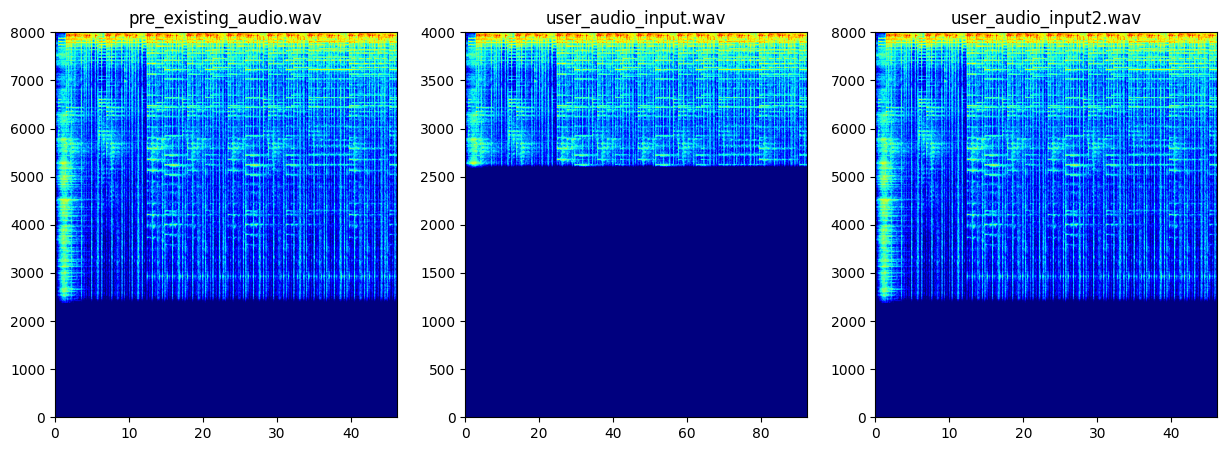

In [13]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio files
audio_files = ["pre_existing_audio.wav", "user_audio_input.wav", "user_audio_input2.wav"]
signals = [librosa.load(file)[0] for file in audio_files]

# Compute spectrograms
specs = [np.abs(librosa.stft(signal))**2 for signal in signals]

# Plot spectrograms side by side
fig, axs = plt.subplots(nrows=1, ncols=len(audio_files), figsize=(15, 5))

for i in range(len(audio_files)):
    axs[i].set_title(audio_files[i])
    axs[i].imshow(librosa.power_to_db(specs[i], ref=np.max), extent=[0, len(signals[i])/librosa.get_samplerate(audio_files[i]), 0, librosa.get_samplerate(audio_files[i])/2], aspect='auto', cmap='jet')

plt.show()